<a href="https://colab.research.google.com/github/G0nkly/pytorch_sandbox/blob/main/gpts/DIY_AK_GPT2_Take3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##
# LETS DO THE FOLLOWING
# TASK I:
# - download https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
# - load the downloaded data, create a vocab and a tokenization
# - split the dataset into train and test and move it into the pytorch "world"
# - create a get_batch(split) function
# - create a estimate_loss() function (for the loss on train and test)
# - create a Bigram model with a forward(self, x, targets) and generate(self, idx, max_new_tokens) function
# - create a train loop (with evaluation) and extract all hyperparameters into a separate space
# - use the model on some example input
# - common pitfalls: torch device, # of parameters, train loop + eval
#
# TASK II:
# - Create a new model from the Bigram Model and add the following
# -- Positional Encoding
# -- A single attention head
# -- Multiple Attention Heads in parallel
# -- A FeedForward Layer
# -- LayerNorm and Residual Connections


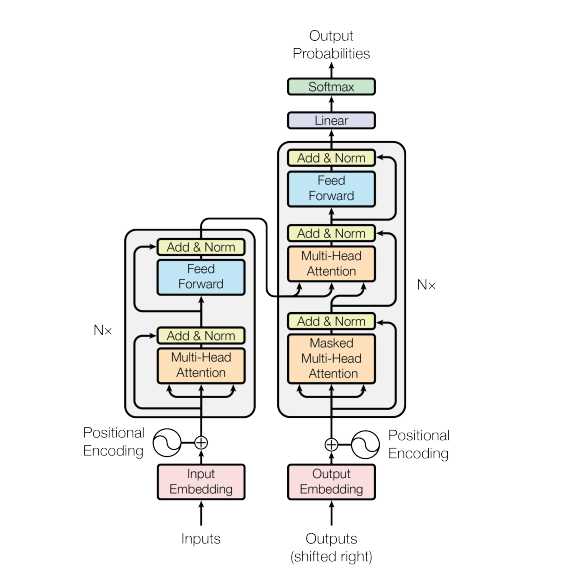

In [3]:
##################
# Data Retrieval #
##################

In [4]:
! wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-11-22 14:36:34--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2025-11-22 14:36:34 (17.2 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [8]:
with open("input.txt", mode="r") as f:
  text = f.read()

text[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

In [26]:
###################
# HYPERPARAMETERS #
###################
block_size = 8
batch_size = 32

In [9]:
##########################
# DATASET & TOKENIZATION #
##########################

In [30]:
import torch

vocab = list(sorted(set(text)))
stoi = {v:k for k, v in enumerate(vocab)}
itos = {k:v for k, v in enumerate(vocab)}

encode = lambda seq: [stoi[char] for char in seq]
decode = lambda indices: ''.join([itos[index] for index in indices])

data = torch.tensor(encode(text))
data_size = len(data)
train_max_idx = int(0.8 * data_size)
test_max_idx = int(0.9 * data_size)

train = data[:train_max_idx]
test = data[train_max_idx : test_max_idx]
val = data[test_max_idx:]

len(train), len(test), len(val)

(892315, 111539, 111540)

In [32]:
def get_batch(split: str):
    train if split == "train" else test

In [31]:
# QUESTIONS
# - data shuffeling?
# - train, test, val?